Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

In [2]:
np.random.seed(42)

Store Dataset 

In [3]:
filePath = '/cxldata/datasets/project/bikes.csv'
bikesData = pd.read_csv(filePath)
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bikesData['yr']

0        0
1        0
2        0
3        0
4        0
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: yr, Length: 17379, dtype: int64

Drop Datsets

In [6]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']

In [7]:
bikesData = bikesData.drop(columnsToDrop,axis=1)

In [8]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(bikesData,random_state=42,test_size=.3)

In [10]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
print("Training Instances: ",train_set.shape)
print("Testing Instances: ",test_set.shape)

Training Instances:  (12165, 13)
Testing Instances:  (5214, 13)


In [12]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [13]:
columnsToScale=['hum','temp','windspeed']

In [14]:
scaler = StandardScaler()

In [15]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
pd.options.mode.chained_assignment = None

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])
pd.options.mode.chained_assignment = None

In [17]:
train_set.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,1.216500e+04,1.216500e+04,1.216500e+04,12165.000000,12165.000000
mean,2.510399,0.501767,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,1.658955e-15,4.775031e-17,-1.367550e-15,191.237649,362.552038
std,1.105498,0.500017,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,1.000041e+00,1.000041e+00,1.000041e+00,182.900931,209.592847
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000e+00,-3.245965e+00,-1.552670e+00,1.000000,0.041667
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.186290e-01,-7.628859e-01,-6.962541e-01,40.000000,181.333333
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.005628e-02,1.307622e-02,-2.069907e-01,145.000000,361.791667
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.387416e-01,8.407692e-01,5.264946e-01,282.000000,545.333333
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.599698e+00,1.927116e+00,5.419128e+00,976.000000,724.083333


In [18]:
bikesData.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.627229,0.190098,189.463088,362.041667
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.192930,0.122340,181.387599,209.042896
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,40.000000,181.020833
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,142.000000,362.041667
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,281.000000,543.062500
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,977.000000,724.083333


In [19]:
train_set['temp'].mean()

1.6589552036519725e-15

In [20]:
test_set['temp'].mean()

-0.018492355565841775

In [21]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [23]:
trainingCols = train_set.drop(columns=['cnt'])

In [24]:
trainingLabels = train_set['cnt']

In [25]:
dec_reg = DecisionTreeRegressor()

In [26]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)

Scores: [42.94494659 49.17912901 35.97206245 44.15365653 47.18077239 76.44407895
 57.19243421 47.65460526 51.91118421 96.50493421]
Mean: 54.91378038100593
Standard deviation: 17.235976527039966


In [27]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 68.75164598  77.89787997  55.2053982   73.8702865   74.08938837
 114.72476001  96.05004435  81.67842009  89.91412661 149.54903152]
Mean: 88.17309816096285
Standard deviation: 25.596518717701052


In [28]:
lin_reg = LinearRegression()
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942255
Standard deviation: 31.426965705295334


In [29]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181802
Standard deviation: 37.55565075919532


In [30]:
forest_reg = RandomForestRegressor()
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)

Scores: [32.88327855 31.99405916 29.08971241 31.84734593 36.41548891 58.02004112
 40.64833059 41.61253289 37.78137336 84.78086349]
Mean: 42.507302641039225
Standard deviation: 16.08793500295835


In [31]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [ 47.6675462   52.92748572  44.32036915  52.0200773   60.68535178
  94.23701569  67.33318167  66.12141998  61.22083776 135.65632115]
Mean: 68.2189606390822
Standard deviation: 26.125440449232208


In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [120, 150],'max_features': [10, 12], 'max_depth': [15, 28] },
]

In [33]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [34]:
grid_search.fit(trainingCols, trainingLabels)
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Estimator:", best_estimator)
print("Best Hyperparameters:", best_params)

Best Estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best Hyperparameters: {'max_depth': 28, 'max_features': 10, 'n_estimators': 120}


In [35]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [36]:
print(feature_importances)

[0.00558012 0.0057261  0.00571007 0.57870737 0.0019846  0.01836809
 0.06999513 0.01652049 0.09876088 0.03511085 0.00953157 0.15400471]


In [70]:
final_model = grid_search.best_estimator_

In [71]:
test_set.sort_values('dayCount', axis= 0, inplace=True)

In [72]:
test_x_cols = test_set.drop(columns=['cnt']).columns.values

In [73]:
test_y_cols = 'cnt'

In [74]:
X_test = test_set.loc[:, test_x_cols]

In [75]:
y_test = test_set.loc[:,test_y_cols]

In [86]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print(final_mse)
test_set.describe()

39.24999408899986


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,2.481204,0.504411,6.480437,11.471423,0.030687,3.001534,0.685846,1.422133,-0.018492,-0.004197,0.017498,185.322785,360.850898,186.817186
std,1.110062,0.500028,3.457991,6.887845,0.172484,1.995486,0.464223,0.637995,0.990859,0.993451,1.008611,177.755171,207.769276,171.258392
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000,-3.245965,-1.552670,1.000000,0.000000,1.383333
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.818629,-0.762886,-0.696254,41.000000,180.781250,49.360417
50%,2.000000,1.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.010056,0.013076,0.037231,136.000000,362.375000,144.450000
75%,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.735156,0.789038,0.526495,277.000000,537.104167,276.470208
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.392526,1.927116,5.419128,977.000000,724.041667,911.583333


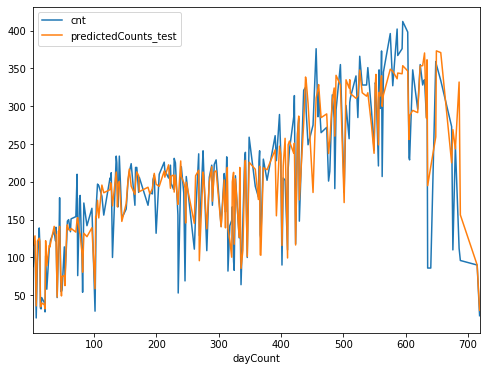

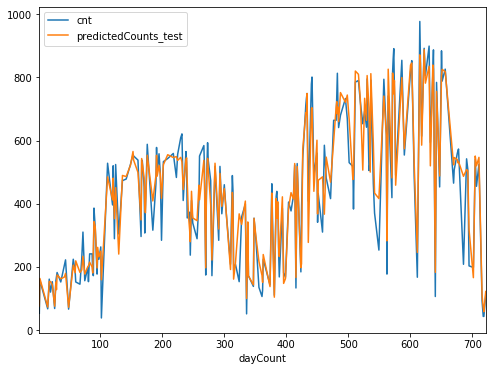

In [88]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()